<a href="https://colab.research.google.com/github/gohilunnati/CNSpracs/blob/main/MAE551Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn


In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [1]:
pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.7 MB/s eta 0:00:00


In [2]:
#import the required libraries
import sklearn
import time
import pandas as pd
import fastf1 as ff1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#create empty dataframes
all_laps = pd.DataFrame()
all_weather = pd.DataFrame()
all_data = pd.DataFrame()

In [4]:
#call sessions
#call sessions
zandvoort23=ff1.get_session(2023,13,'R')
monza23=ff1.get_session(2023,14,'R')
singapore23=ff1.get_session(2023,15,'R')


req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1


In [5]:
#load sessions
zandvoort23.load()
monza23.load()
singapore23.load()

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Dutch Grand Prix - Race [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data.

In [6]:
#call laps
zandvoort23Laps = zandvoort23.laps
monza23Laps = monza23.laps
singapore23Laps = singapore23.laps

In [7]:
#add event
zandvoort23Laps['event']='R13_23 '
monza23Laps['event']='R14_23 '
singapore23Laps['event']='R15_23 '

In [8]:
#add circuit
zandvoort23Laps['circuit']='Zandvoort'
monza23Laps['circuit']='Monza'
singapore23Laps['circuit']='Singapore'

In [9]:
#add weather data
zandvoort23LapsWeather=zandvoort23Laps.get_weather_data()
monza23LapsWeather=monza23Laps.get_weather_data()
singapore23LapsWeather=singapore23Laps.get_weather_data()


In [10]:
import pandas as pd
all_laps = pd.concat([all_laps, zandvoort23Laps, monza23Laps, singapore23Laps], ignore_index=True)


In [11]:
# Concatenate all the DataFrames
all_weather = pd.concat(
    [all_weather, zandvoort23LapsWeather, monza23LapsWeather, singapore23LapsWeather],
    ignore_index=True
)

In [12]:
all_data = pd.concat([all_data, all_laps], ignore_index=True)

In [13]:
#join weather data
all_data = all_data.join(all_weather,lsuffix='_lap',rsuffix='_weather')

In [ ]:
all_data

,Time_lap,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,event,circuit,Time_weather,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 01:03:36.820000,VER,1,0 days 00:01:31.585000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:28.929000,...,R13_23,Zandvoort,0 days 01:02:46.506000,17.6,67.0,1007.7,False,29.5,135,1.8
1,0 days 01:05:26.792000,VER,1,0 days 00:01:49.972000,2.0,1.0,NaT,0 days 01:05:25.519000,0 days 00:00:36.330000,0 days 00:00:36.685000,...,R13_23,Zandvoort,0 days 01:03:46.505000,17.5,67.0,1007.7,True,28.6,157,1.7
2,0 days 01:07:15.450000,VER,1,0 days 00:01:48.658000,3.0,2.0,0 days 01:05:45.581000,NaT,0 days 00:00:49.822000,0 days 00:00:30.905000,...,R13_23,Zandvoort,0 days 01:05:46.519000,17.2,69.0,1007.9,True,27.3,158,1.2
3,0 days 01:08:40.701000,VER,1,0 days 00:01:25.251000,4.0,2.0,NaT,NaT,0 days 00:00:29.996000,0 days 00:00:29.479000,...,R13_23,Zandvoort,0 days 01:07:46.610000,16.7,70.0,1007.7,True,26.2,187,1.3
4,0 days 01:10:04.162000,VER,1,0 days 00:01:23.461000,5.0,2.0,NaT,NaT,0 days 00:00:28.478000,0 days 00:00:29.064000,...,R13_23,Zandvoort,0 days 01:08:46.562000,16.4,68.0,1007.7,True,24.8,150,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,0 days 02:43:23.690000,PIA,81,0 days 00:01:39.516000,58.0,2.0,NaT,NaT,0 days 00:00:28.760000,0 days 00:00:42.758000,...,R15_23,Singapore,0 days 02:42:24.001000,29.5,76.0,1010.2,False,34.9,160,2.0
3394,0 days 02:45:03.118000,PIA,81,0 days 00:01:39.428000,59.0,2.0,NaT,NaT,0 days 00:00:28.846000,0 days 00:00:42.820000,...,R15_23,Singapore,0 days 02:43:24.016000,29.5,76.0,1010.2,False,35.0,173,2.0
3395,0 days 02:46:42.307000,PIA,81,0 days 00:01:39.189000,60.0,2.0,NaT,NaT,0 days 00:00:28.727000,0 days 00:00:42.662000,...,R15_23,Singapore,0 days 02:45:24.015000,29.5,76.0,1010.2,False,35.1,191,1.8
3396,0 days 02:48:21.923000,PIA,81,0 days 00:01:39.616000,61.0,2.0,NaT,NaT,0 days 00:00:28.891000,0 days 00:00:42.782000,...,R15_23,Singapore,0 days 02:47:24.014000,29.5,76.0,1010.0,False,34.9,171,1.7


In [14]:
all_data.shape

(3398, 41)

In [15]:
all_data.to_csv("SimulationData.csv")

In [16]:
#loading the data
stint_data = pd.read_csv('SimulationData.csv')

In [17]:
stint_data.head()

,Unnamed: 0,Time_lap,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,event,circuit,Time_weather,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0,0 days 01:03:36.820000,VER,1,0 days 00:01:31.585000,1.0,1.0,NaN,NaN,NaN,...,R13_23,Zandvoort,0 days 01:02:46.506000,17.6,67.0,1007.7,False,29.5,135,1.8
1,1,0 days 01:05:26.792000,VER,1,0 days 00:01:49.972000,2.0,1.0,NaN,0 days 01:05:25.519000,0 days 00:00:36.330000,...,R13_23,Zandvoort,0 days 01:03:46.505000,17.5,67.0,1007.7,True,28.6,157,1.7
2,2,0 days 01:07:15.450000,VER,1,0 days 00:01:48.658000,3.0,2.0,0 days 01:05:45.581000,NaN,0 days 00:00:49.822000,...,R13_23,Zandvoort,0 days 01:05:46.519000,17.2,69.0,1007.9,True,27.3,158,1.2
3,3,0 days 01:08:40.701000,VER,1,0 days 00:01:25.251000,4.0,2.0,NaN,NaN,0 days 00:00:29.996000,...,R13_23,Zandvoort,0 days 01:07:46.610000,16.7,70.0,1007.7,True,26.2,187,1.3
4,4,0 days 01:10:04.162000,VER,1,0 days 00:01:23.461000,5.0,2.0,NaN,NaN,0 days 00:00:28.478000,...,R13_23,Zandvoort,0 days 01:08:46.562000,16.4,68.0,1007.7,True,24.8,150,1.7


In [ ]:
#checking dataset information
stint_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398 entries, 0 to 3397
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3398 non-null   int64  
 1   Time_lap            3398 non-null   object 
 2   Driver              3398 non-null   object 
 3   DriverNumber        3398 non-null   int64  
 4   LapTime             3320 non-null   object 
 5   LapNumber           3398 non-null   float64
 6   Stint               3398 non-null   float64
 7   PitOutTime          153 non-null    object 
 8   PitInTime           153 non-null    object 
 9   Sector1Time         3298 non-null   object 
 10  Sector2Time         3373 non-null   object 
 11  Sector3Time         3373 non-null   object 
 12  Sector1SessionTime  3294 non-null   object 
 13  Sector2SessionTime  3373 non-null   object 
 14  Sector3SessionTime  3373 non-null   object 
 15  SpeedI1             2811 non-null   float64
 16  SpeedI

In [ ]:
# Step 1: Handle Missing Values for Numerical Columns
numeric_columns = stint_data.select_dtypes(include=['float64', 'int64']).columns
stint_data[numeric_columns] = stint_data[numeric_columns].fillna(stint_data[numeric_columns].mean())

# Step 2: Handle Missing Values for Categorical Columns (like 'Compound')
stint_data['Compound'].fillna(stint_data['Compound'].mode()[0], inplace=True)

<ipython-input-24-494036af62b5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stint_data['Compound'].fillna(stint_data['Compound'].mode()[0], inplace=True)


In [ ]:
# Step 2: Feature Engineering
# Select relevant features for the model
features = ['AirTemp', 'Compound', 'TrackTemp', 'SpeedFL', 'Stint','Humidity','circuit']
X = stint_data[features]


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['Compound'] = label_encoder.fit_transform(X['Compound'])

<ipython-input-26-7346b940ccb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Compound'] = label_encoder.fit_transform(X['Compound'])


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['circuit'] = label_encoder.fit_transform(X['circuit'])

<ipython-input-29-985b5d091016>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['circuit'] = label_encoder.fit_transform(X['circuit'])


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['AirTemp', 'Compound', 'TrackTemp', 'SpeedFL', 'Stint','Humidity','circuit']] = scaler.fit_transform(X[['AirTemp', 'Compound', 'TrackTemp', 'SpeedFL', 'Stint','Humidity','circuit']])


<ipython-input-30-f954f24b0d2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['AirTemp', 'Compound', 'TrackTemp', 'SpeedFL', 'Stint','Humidity','circuit']] = scaler.fit_transform(X[['AirTemp', 'Compound', 'TrackTemp', 'SpeedFL', 'Stint','Humidity','circuit']])


In [ ]:
y = stint_data['TyreLife']


In [ ]:
from sklearn.model_selection import train_test_split

# Now, you can split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

# Train the model using the training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance using MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Print the predicted values
print("\nPredicted values for the test set:")
print(y_pred)

# If you want to see the predicted vs actual values
predicted_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted values:")
print(predicted_vs_actual)


Mean Squared Error (MSE): 22.889907483693396
R-squared: 0.7632918866212111

Predicted values for the test set:
[ 2.55       18.71616667 25.76        7.21        4.8245      2.
  2.44004762  8.75533333 14.99545455 24.36       17.86        3.24688889
  8.5875     18.20883333 18.971      10.91        5.40714286  1.01
  8.23       16.77       11.66766667  4.275      24.88       14.01
 21.71       11.0825     11.69333333  1.          1.01       10.828
 22.51266667 20.10483333 18.88        6.995      14.26        7.
 23.85       31.35792857  1.93478571  3.8         6.71533333 29.2645
 11.96152381  8.90904762  4.21       13.4475     11.24       31.2745
 13.49266667 13.78166667 26.7335      3.1365     10.26666667  9.94025611
  6.165      24.05814286 15.43385714  6.          9.72       17.93
  4.18716667  2.45961905 39.765      10.18275    14.07659452  6.95988095
  2.74       29.9025     10.42       10.65333333 11.88247619 21.4495
  8.98997222 23.03       31.52666667 16.          8.81990937  5.

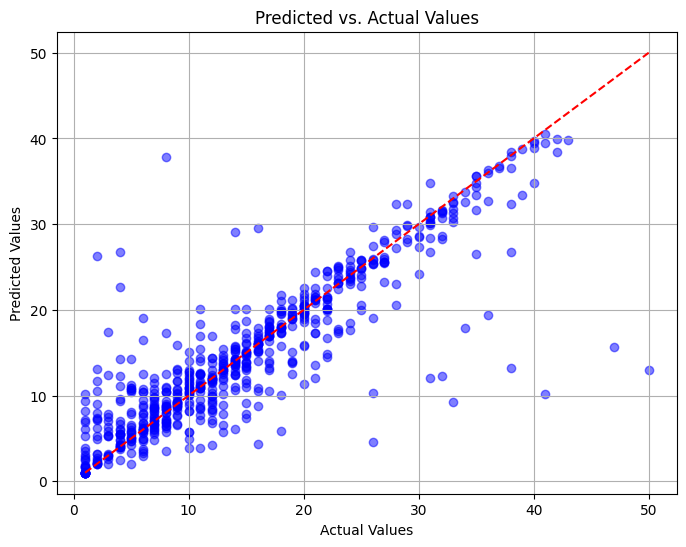

In [ ]:
import matplotlib.pyplot as plt

# Assuming `y_true` is the actual target values and `y_pred` are the model predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()


In [ ]:
print("Regression Model Performance:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Regression Model Performance:
Mean Squared Error (MSE): 22.889907483693396
R-squared: 0.7632918866212111


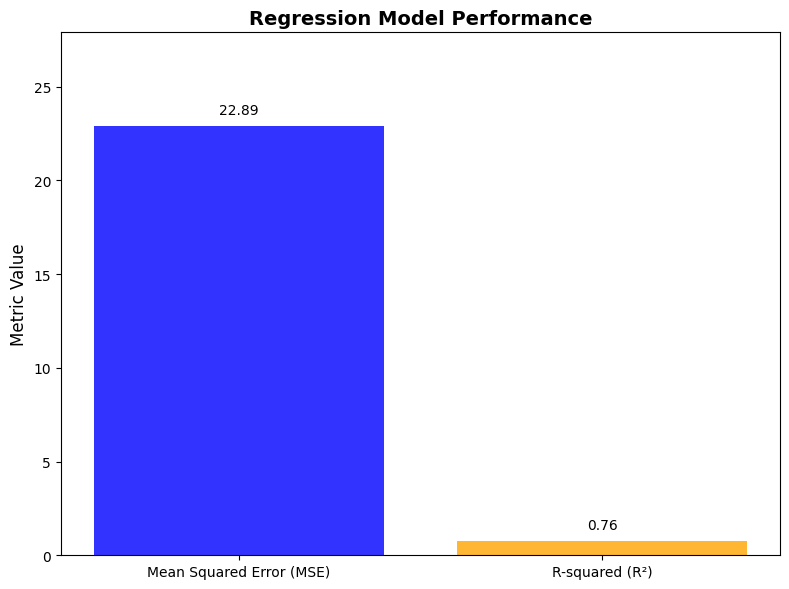

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for regression model performance
metrics = ['Mean Squared Error (MSE)', 'R-squared (R²)']
values = [22.889907483693396, 0.7632918866212111]

# Colors to distinguish metrics
colors = ['blue', 'orange']

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(metrics, values, color=colors, alpha=0.8)
ax.set_title('Regression Model Performance', fontsize=14, weight='bold')
ax.set_ylabel('Metric Value', fontsize=12)
ax.set_ylim(0, max(values) + 5)

# Adding labels above bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
importances = model.feature_importances_
feature_importance = pd.DataFrame(importances, index=X.columns, columns=["Importance"])
print("Feature Importance:\n", feature_importance)

Feature Importance:
            Importance
AirTemp      0.148021
Compound     0.117044
TrackTemp    0.284846
SpeedFL      0.154201
Stint        0.123477
Humidity     0.169893
circuit      0.002517


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have already split your data into training and test sets
# For classification, create a binary target based on your threshold

threshold = 50  # Define a threshold for worn-out tires
y_binary_train = (y_train < threshold).astype(int)  # 1 for worn-out, 0 for not worn-out
y_binary_test = (y_test < threshold).astype(int)  # 1 for worn-out, 0 for not worn-out

# Train the model as a classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_binary_train)

# Predict on the test data
y_pred_binary = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_binary_test, y_pred_binary)
conf_matrix = confusion_matrix(y_binary_test, y_pred_binary)
class_report = classification_report(y_binary_test, y_pred_binary)

# Displaying results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Print the actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y_binary_test,
    'Predicted': y_pred_binary
})

print("Actual vs Predicted values for Test Set:")
print(comparison_df)


Accuracy: 0.9985294117647059
Confusion Matrix:
[[  0   1]
 [  0 679]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       679

    accuracy                           1.00       680
   macro avg       0.50      0.50      0.50       680
weighted avg       1.00      1.00      1.00       680

Actual vs Predicted values for Test Set:
      Actual  Predicted
291        1          1
2736       1          1
2334       1          1
432        1          1
479        1          1
...      ...        ...
572        1          1
2439       1          1
3113       1          1
1055       1          1
765        1          1

[680 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import train_test_split

# Now, you can split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have already split your data into training and test sets
# For classification, create a binary target based on your threshold

threshold = 50  # Define a threshold for worn-out tires
y_binary_train = (y_train < threshold).astype(int)  # 1 for worn-out, 0 for not worn-out
y_binary_test = (y_test < threshold).astype(int)  # 1 for worn-out, 0 for not worn-out

# Train the model as a classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_binary_train)

# Predict on the test data
y_pred_binary = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_binary_test, y_pred_binary)
conf_matrix = confusion_matrix(y_binary_test, y_pred_binary)
class_report = classification_report(y_binary_test, y_pred_binary)

# Displaying results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Print the actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y_binary_test,
    'Predicted': y_pred_binary
})

print("Actual vs Predicted values for Test Set:")
print(comparison_df)


Accuracy: 0.9992647058823529
Confusion Matrix:
[[   0    1]
 [   0 1359]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00      1359

    accuracy                           1.00      1360
   macro avg       0.50      0.50      0.50      1360
weighted avg       1.00      1.00      1.00      1360

Actual vs Predicted values for Test Set:
      Actual  Predicted
291        1          1
2736       1          1
2334       1          1
432        1          1
479        1          1
...      ...        ...
1789       1          1
1577       1          1
2086       1          1
2063       1          1
2827       1          1

[1360 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


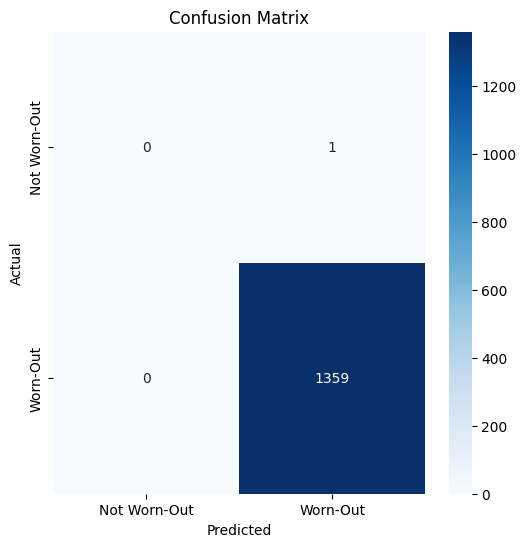

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


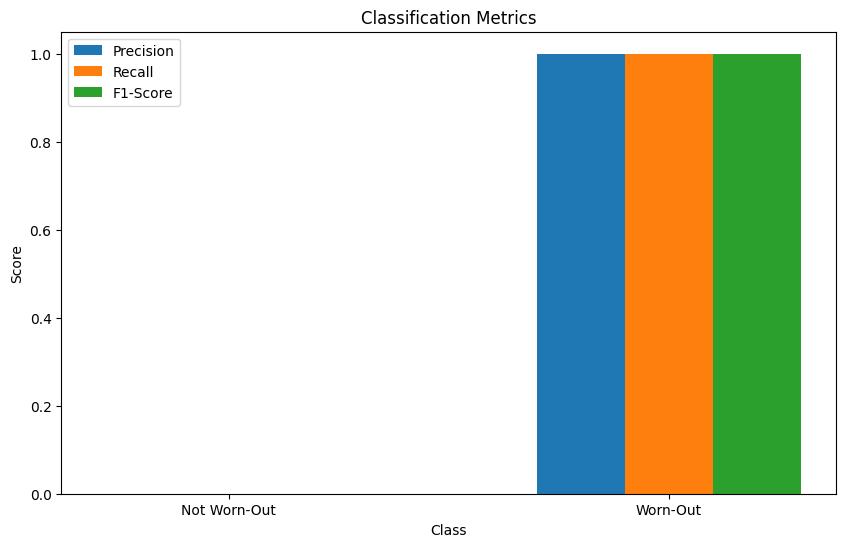

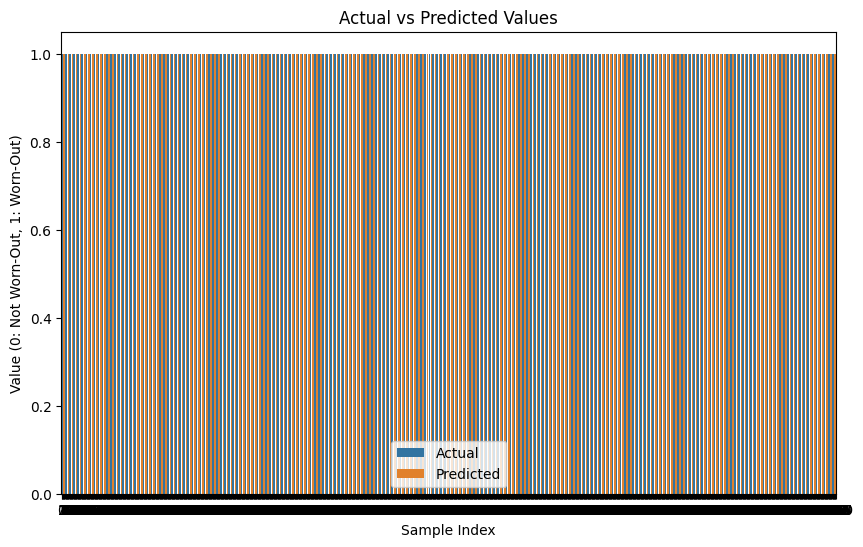

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Worn-Out', 'Worn-Out'], yticklabels=['Not Worn-Out', 'Worn-Out'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report Bar Chart
report_dict = classification_report(y_binary_test, y_pred_binary, output_dict=True)
precision = [report_dict['0']['precision'], report_dict['1']['precision']]
recall = [report_dict['0']['recall'], report_dict['1']['recall']]
f1_score = [report_dict['0']['f1-score'], report_dict['1']['f1-score']]
labels = ['Not Worn-Out', 'Worn-Out']

x = np.arange(len(labels))  # Label locations
width = 0.2  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1-Score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Metrics')
plt.xticks(x, labels)
plt.legend(loc='best')
plt.show()

# Actual vs Predicted Comparison Bar Chart
comparison_df['Index'] = range(len(comparison_df))
plt.figure(figsize=(10, 6))
sns.barplot(x='Index', y='value', hue='variable',
            data=pd.melt(comparison_df, id_vars=['Index'], value_vars=['Actual', 'Predicted']))
plt.xlabel('Sample Index')
plt.ylabel('Value (0: Not Worn-Out, 1: Worn-Out)')
plt.title('Actual vs Predicted Values')
plt.legend(loc='best')
plt.show()


In [ ]:
data = pd.read_csv('SimulationData.csv')

# Check for missing values
print(data.isnull().sum())

Unnamed: 0               0
Time_lap                 0
Driver                   0
DriverNumber             0
LapTime                 78
LapNumber                0
Stint                    0
PitOutTime            3245
PitInTime             3245
Sector1Time            100
Sector2Time             25
Sector3Time             25
Sector1SessionTime     104
Sector2SessionTime      25
Sector3SessionTime      25
SpeedI1                587
SpeedI2                 25
SpeedFL                181
SpeedST                570
IsPersonalBest          23
Compound                 0
TyreLife                 0
FreshTyre                0
Team                     0
LapStartTime             0
LapStartDate            23
TrackStatus              0
Position                25
Deleted                  0
DeletedReason         3373
FastF1Generated          0
IsAccurate               0
event                    0
circuit                  0
Time_weather             0
AirTemp                  0
Humidity                 0
P

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from a CSV file (replace 'your_file.csv' with the actual file path)
data = pd.read_csv('SimulationData.csv')

# Check for missing values
print(data.isnull().sum())

# Handle missing values - either drop rows or fill with mean
data = data.dropna()  # or use data.fillna(data.mean())

# Convert categorical 'Compound' feature to numerical using label encoding
data['Compound'] = data['Compound'].map({'SOFT': 0, 'MEDIUM': 1, 'HARD': 2})

# Define features (X) and target variable (y)
X = data[['Time_weather', 'Compound','AirTemp','Humidity','Pressure','Rainfall', 'TrackTemp', 'WindDirection']]  # Add the relevant features
y = data['TyreLife']  # Target variable (TyreLife)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))  # Input layer
model.add(Dense(units=32, activation='relu'))  # Hidden layer
model.add(Dense(units=16, activation='relu'))  # Hidden layer
model.add(Dense(units=1))  # Output layer (regression)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
epochs = 100
history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, validation_data=(X_test_scaled, y_test))

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Display predicted vs actual values
predicted_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print("\nActual vs Predicted values:")
print(predicted_vs_actual)


Unnamed: 0               0
Time_lap                 0
Driver                   0
DriverNumber             0
LapTime                 78
LapNumber                0
Stint                    0
PitOutTime            3245
PitInTime             3245
Sector1Time            100
Sector2Time             25
Sector3Time             25
Sector1SessionTime     104
Sector2SessionTime      25
Sector3SessionTime      25
SpeedI1                587
SpeedI2                 25
SpeedFL                181
SpeedST                570
IsPersonalBest          23
Compound                 0
TyreLife                 0
FreshTyre                0
Team                     0
LapStartTime             0
LapStartDate            23
TrackStatus              0
Position                25
Deleted                  0
DeletedReason         3373
FastF1Generated          0
IsAccurate               0
event                    0
circuit                  0
Time_weather             0
AirTemp                  0
Humidity                 0
P

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from a CSV file (replace 'your_file.csv' with the actual file path)
data = pd.read_csv('SimulationData.csv')

# Check for missing values
print(data.isnull().sum())

# Handle missing values - fill with mean or mode
  # Example for a numeric column
data['Compound'] = data['Compound'].fillna(data['Compound'].mode()[0])  # Example for categorical column

# Define features (X) and target variable (y)
X = data[['Time_weather', 'Compound','AirTemp','Humidity','Pressure','Rainfall', 'TrackTemp', 'WindDirection']]  # Add the relevant features
y = data['TyreLife']  # Target variable (TyreLife)  # Target variable (TyreLife)

# Check the shape of X and y
print(X.shape)
print(y.shape)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train_scaled.shape[1]))  # Input layer
model.add(Dense(units=16, activation='relu'))  # Hidden layer
model.add(Dense(units=16, activation='relu'))  # Hidden layer
model.add(Dense(units=1))  # Output layer (regression)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
epochs = 100
history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, validation_data=(X_test_scaled, y_test))

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Display predicted vs actual values
predicted_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print("\nActual vs Predicted values:")
print(predicted_vs_actual)


Unnamed: 0               0
Time_lap                 0
Driver                   0
DriverNumber             0
LapTime                 96
LapNumber                0
Stint                    0
PitOutTime            3245
PitInTime             3245
Sector1Time            100
Sector2Time             25
Sector3Time             25
Sector1SessionTime     104
Sector2SessionTime      25
Sector3SessionTime      25
SpeedI1                587
SpeedI2                 25
SpeedFL                181
SpeedST                570
IsPersonalBest          23
Compound                 0
TyreLife                 0
FreshTyre                0
Team                     0
LapStartTime             0
LapStartDate            23
TrackStatus              0
Position                25
Deleted                  0
DeletedReason         3373
FastF1Generated          0
IsAccurate               0
event                    0
circuit                  0
Time_weather             0
AirTemp                  0
Humidity                 0
P

ValueError: could not convert string to float: '0 days 02:34:36.537000'

In [ ]:
pip install tensorflow


In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame
data = {'Category': ['soft', 'medium', 'hard', 'intermediate', 'soft', 'hard']}
df = pd.DataFrame(data)

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Category' column
df['Encoded_Category'] = le.fit_transform(df['Category'])

print(df)

       Category  Encoded_Category
0          soft                 3
1        medium                 2
2          hard                 0
3  intermediate                 1
4          soft                 3
5          hard                 0


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
file_path = '/content/SimulationData.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select relevant features and target
features = [
     "AirTemp", "Humidity", "Pressure", "TrackTemp", "WindDirection", "Rainfall", "Compound", "FreshTyre"
]
target = "TyreLife"

# Filter data for these columns
filtered_data = data[features + [target]].dropna(subset=[target])

# Encode categorical features
label_encoders = {}
for col in [ 'FreshTyre',"Rainfall","Compound"]:
    le = LabelEncoder()
    filtered_data[col] = le.fit_transform(filtered_data[col])
    label_encoders[col] = le

# Separate features and target
X = filtered_data[features]
y = filtered_data[target]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 248.5002 - val_loss: 137.2233
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 111.4741 - val_loss: 84.9331
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 85.2877 - val_loss: 82.2171
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87.8853 - val_loss: 81.4698
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 81.7742 - val_loss: 79.8072
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78.3580 - val_loss: 80.2350
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77.7805 - val_loss: 78.8058
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 79.6051 - val_loss: 78.7972
Epoch 9/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 81.5813 - val_loss: 77.1129
Epoch 10/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 80.1122 - val_loss: 77.3338
Epoch 11/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 78.9530 - val_loss: 77.6738
Epoch 12/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/ste

In [28]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=1
)


Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 58.8718 - mae: 5.9365 - val_loss: 67.1438 - val_mae: 6.3562
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 67.2877 - mae: 6.3777 - val_loss: 67.1981 - val_mae: 6.2955
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 64.3450 - mae: 6.2191 - val_loss: 71.6421 - val_mae: 6.5338
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 66.8080 - mae: 6.2764 - val_loss: 66.8536 - val_mae: 6.3589
Epoch 5/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 64.9794 - mae: 6.2948 - val_loss: 68.1294 - val_mae: 6.3734
Epoch 6/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 66.7081 - mae: 6.4033 - val_loss: 67.0809 - val_mae: 6.3908
Epoch 7/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 62.8103 - mae: 6.1521 - val_loss: 69.4480 - val_mae: 6.4150
Epoch 8/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 63.1710 - mae: 6.1448 - val_loss: 66.5908 - val_mae: 6.3475
Epoch 9/100
136/136 ━━━━━━━━━━━━

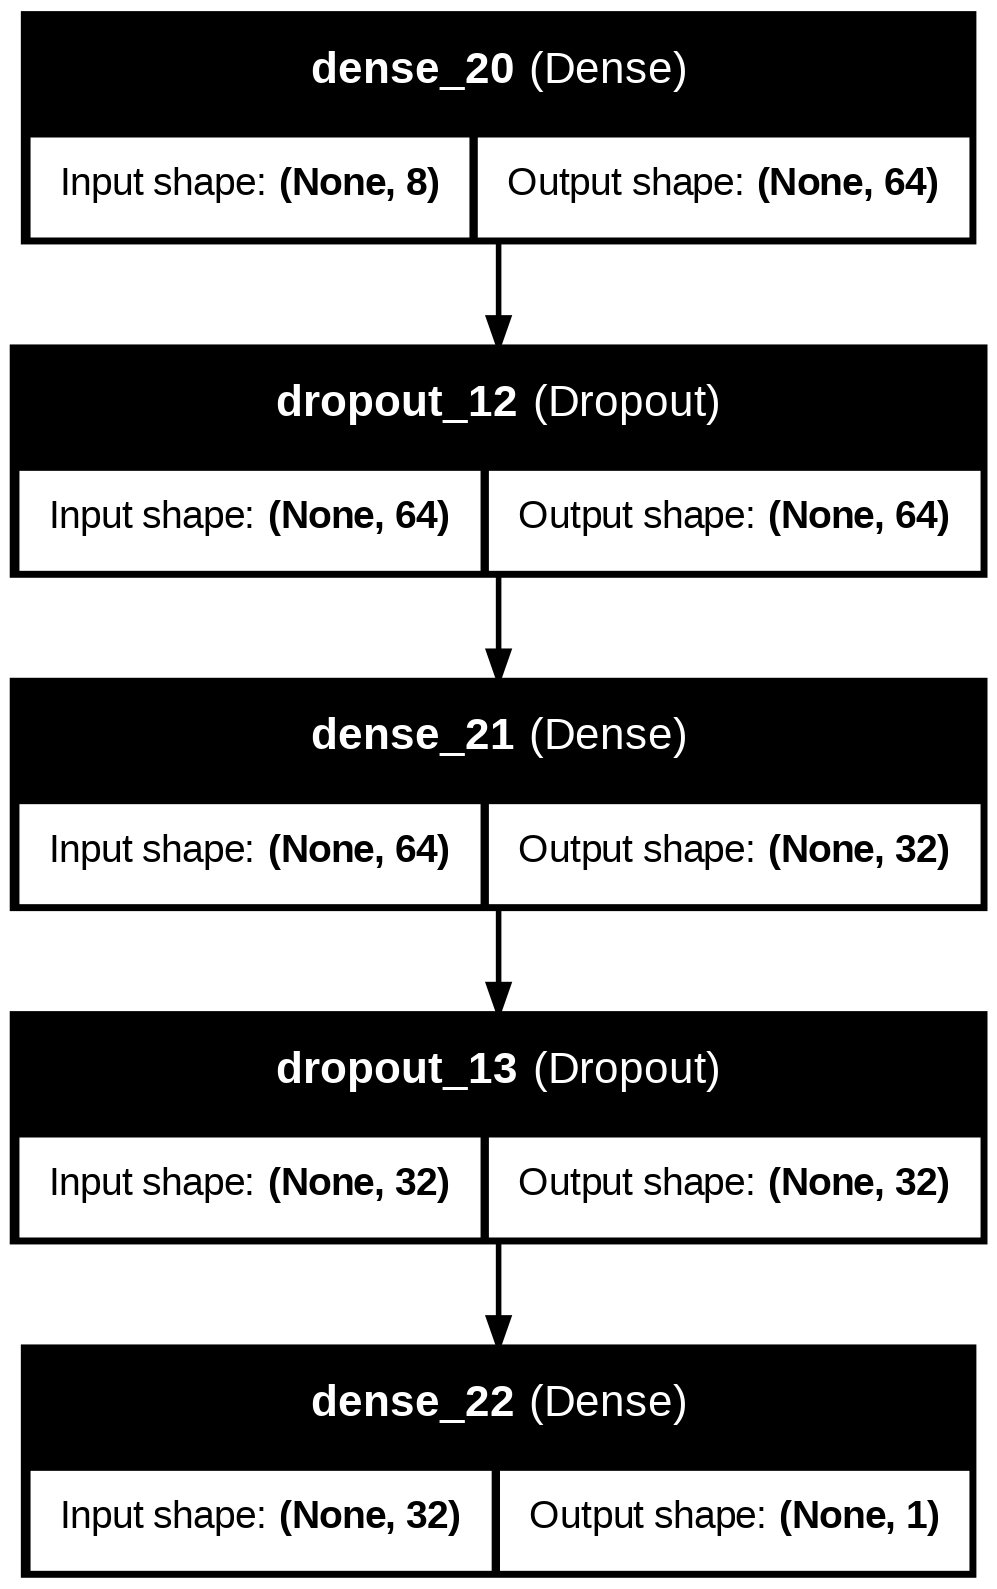

In [36]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture with detailed information
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Simpler plot (optional)
# plot_model(model, show_shapes=False, show_layer_names=False)

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.5696 - val_loss: 44.3990
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 45.3512 - val_loss: 45.0800
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.8029 - val_loss: 44.4756
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.9085 - val_loss: 45.3153
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.9055 - val_loss: 43.2877
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.8924 - val_loss: 45.3951
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.4209 - val_loss: 43.7708
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.3593 - val_loss: 44.3629
Epoch 9/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.5869 - val_loss: 44.4415
Epoch 10/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.5690 - val_loss: 43.7808
Epoch 11/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.3639 - val_loss: 44.1762
Epoch 12/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1

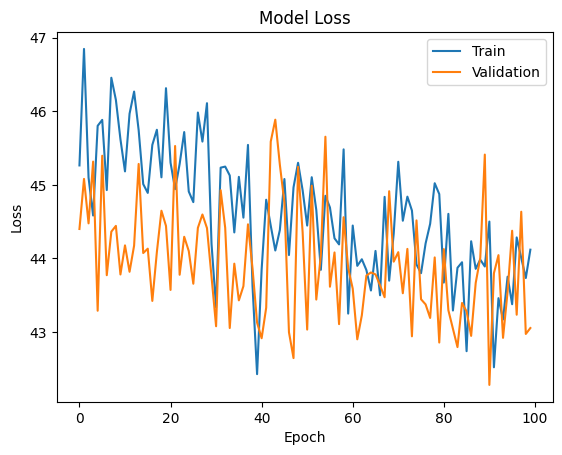

In [38]:
# Train the model (assuming you haven't already)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Import libraries for plotting
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Written By Unnati Gohil
1234157979

In [39]:
pip install SHAP

In [42]:
from sklearn.metrics import roc_curve, auc

# Assuming you have a binary classification model
fpr, tpr, thresholds = roc_curve(y_test, y_train)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ValueError: multiclass format is not supported